In [79]:
#From the EDA we noticed that there are no negative and 0 corralation between other attribute and Rings.
#We will try to predict the age (by the number of rings as stated in the dataset description).

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings

In [12]:
data = pd.read_csv('abalone.csv')
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

In [13]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [14]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [15]:
categorical_features

Index(['Sex'], dtype='object')

In [16]:
# removing outliers 
abalone = data[data['Height'] < 0.4]

In [17]:
X = data.drop(['age','Sex'], axis = 1).values.reshape(-1,7)
y = data['age'].values.reshape(-1,1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [20]:
# create an estimator, optionally specifying parameters
model = RandomForestRegressor()
# fit the estimator to the data
model.fit(X_train, y_train)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

D:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred_rf = model.predict(X_test)
y_pred_lr= regressor.predict(X_test)

In [24]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_lr = np.sqrt(mse_lr)
print("Random Forest RMSE: ",rmse_rf)
print("Linear Regression RMSE: ",rmse_lr)

Random Forest RMSE:  2.084741605045722
Linear Regression RMSE:  2.1006668429351008


In [25]:
mae_rf= metrics.mean_absolute_error(y_test,y_pred_rf)
mae_lr= metrics.mean_absolute_error(y_test,y_pred_lr)

print("Random Forest MAE: ",mae_rf)
print("Linear Regression MAE: ",mae_lr)

Random Forest MAE:  1.5392727272727273
Linear Regression MAE:  1.5763055671929287


In [26]:
df_rf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rf.flatten()})
df_lr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_lr.flatten()})

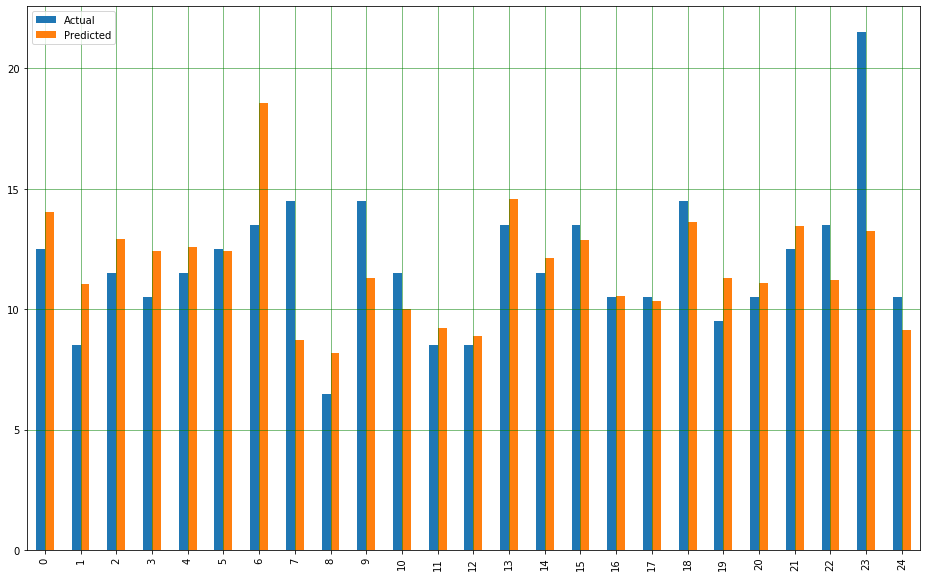

In [27]:
df1 = df_rf.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

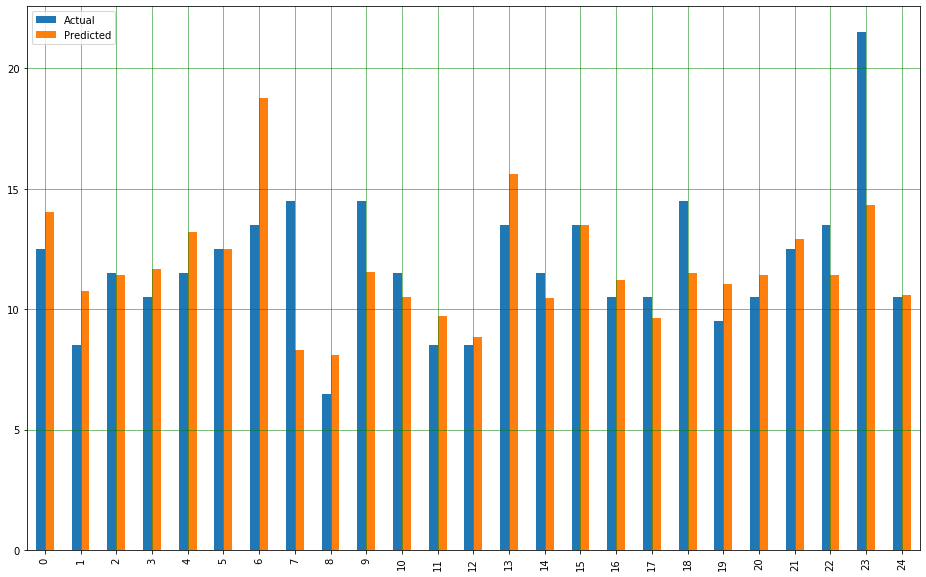

In [28]:
df1 = df_lr.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()